In [53]:
import numpy as np
import matplotlib.pylab as plt
import sys

In [54]:
x = np.arange(100) / 5

In [175]:
def g(a, b, k, x):
    return k * np.maximum(np.exp(-np.exp((a - b * x))), 2/sys.float_info.max)
def dg(a, b, k, x):
    return g(a,b,k,x) * b / k * np.exp(a - b * x)
def dsigmoid(x, a=10):
    return np.exp(-(x - a)) / (1 + np.exp(-(x - a)))**2
def sigmoid(x, a=10):
    return 1 / (1 + np.exp(-(x - a)))
# def sird(x, a=1):
#     return 1 / (1 + np.exp(-(a*x)) - x)

def th_sigmoid(x, x0=1, th=1):
    xp = np.power(x0, th)
    return np.power(xp / (xp + (1-xp) * np.exp(-th * x)), 1/th)

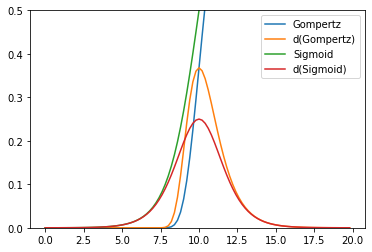

In [59]:
a = 0
b = 1
a = 10
k = 1
plt.plot(x, g(a, b, k, x), label="Gompertz")
plt.plot(x, dg(a, b, k, x), label="d(Gompertz)")
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, dsigmoid(x), label="d(Sigmoid)")
plt.ylim([0, 0.5])
plt.legend()

In [61]:
import sys
def safe_log(x):
    x[np.isinf(x)] = sys.float_info.max - 1
    return np.log(x)

In [145]:
th_sigmoid(x, x0=0.0001, th=1)

array([1.00000000e-04, 1.22137572e-04, 1.49175133e-04, 1.82196901e-04,
       2.22526821e-04, 2.71781483e-04, 3.31934680e-04, 4.05396140e-04,
       4.95107525e-04, 6.04659415e-04, 7.38433820e-04, 9.01777672e-04,
       1.10121387e-03, 1.34469781e-03, 1.64192878e-03, 2.00472756e-03,
       2.44749345e-03, 2.98775624e-03, 3.64684133e-03, 4.45066850e-03,
       5.43070742e-03, 6.62511515e-03, 8.08008191e-03, 9.85141062e-03,
       1.20063527e-02, 1.46257136e-02, 1.78062273e-02, 2.16631714e-02,
       2.63331560e-02, 3.19769562e-02, 3.87821730e-02, 4.69653858e-02,
       5.67733078e-02, 6.84822685e-02, 8.23951431e-02, 9.88346625e-02,
       1.18131935e-01, 1.40609078e-01, 1.66555244e-01, 1.96196147e-01,
       2.29658524e-01, 2.66932813e-01, 3.07839277e-01, 3.52004369e-01,
       3.98854487e-01, 4.47632657e-01, 4.97439931e-01, 5.47298065e-01,
       5.96224835e-01, 6.43309992e-01, 6.87779717e-01, 7.29040443e-01,
       7.66698072e-01, 8.00553867e-01, 8.30582282e-01, 8.56897804e-01,
      

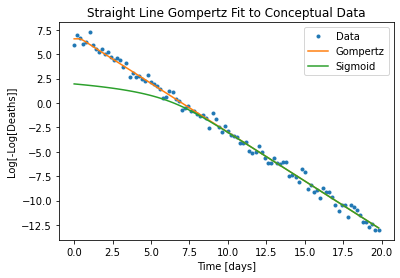

In [157]:
a = 7
plt.plot(x, safe_log(safe_log(1/g(a, b, k, x))) + np.random.standard_normal(len(x))/2, ".", label="Data")
plt.plot(x, safe_log(safe_log(1/g(a, b, k, x))), label="Gompertz")
plt.plot(x, safe_log(safe_log(1/sigmoid(x, a))), label="Sigmoid")
# plt.plot(x, safe_log(safe_log(1/th_sigmoid(x, x0=0.001, th=1.71))), label="Theta-Sigmoid")
plt.legend()
plt.ylabel("Log[-Log[Deaths]]")
plt.xlabel("Time [days]")
plt.title("Straight Line Gompertz Fit to Conceptual Data")
plt.savefig("../figures/Gompertz_concept.pdf")

In [67]:
y = np.random.standard_normal(10000)

<ipython-input-163-36b87e42c39e>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(s, -np.log(1-s))


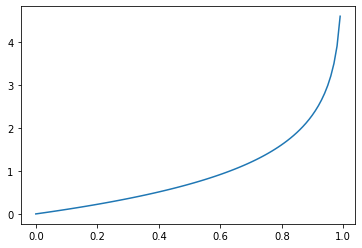

In [163]:
s = x / np.max(x)
plt.plot(s, -np.log(1-s))

<ipython-input-174-126305577410>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(s, -2*s*np.log(s))
<ipython-input-174-126305577410>:1: RuntimeWarning: invalid value encountered in multiply
  plt.plot(s, -2*s*np.log(s))


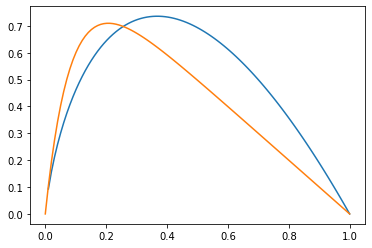

In [174]:
plt.plot(s, -2*s*np.log(s))
plt.plot(s, 1 - s - np.exp(-12*s))